In [ ]:
import pandas as pd

In [1]:
df = pd.read_csv("heart_attack_prediction_indonesia.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [ ]:
print(df.describe(include='all'))

                  age  gender  region income_level   hypertension  \
count   158355.000000  158355  158355       158355  158355.000000   
unique            NaN       2       2            3            NaN   
top               NaN    Male   Urban       Middle            NaN   
freq              NaN   82243  103038        71230            NaN   
mean        54.543778     NaN     NaN          NaN       0.299069   
std         11.910897     NaN     NaN          NaN       0.457851   
min         25.000000     NaN     NaN          NaN       0.000000   
25%         46.000000     NaN     NaN          NaN       0.000000   
50%         55.000000     NaN     NaN          NaN       0.000000   
75%         63.000000     NaN     NaN          NaN       1.000000   
max         90.000000     NaN     NaN          NaN       1.000000   

             diabetes  cholesterol_level        obesity  waist_circumference  \
count   158355.000000      158355.000000  158355.000000        158355.000000   
unique     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [ ]:
print(df.isnull().sum())


age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease                0


K-mean Clustering


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Ambil kolom yang dibutuhkan
features = df[['age', 'sleep_hours', 'gender', 'cholesterol_level', 'smoking_status']].copy()

# Label Encoding untuk gender dan smoking_status
le_gender = LabelEncoder()
le_smoke = LabelEncoder()

features['gender'] = le_gender.fit_transform(features['gender'])
features['smoking_status'] = le_smoke.fit_transform(features['smoking_status'])

# Normalisasi fitur numerik
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


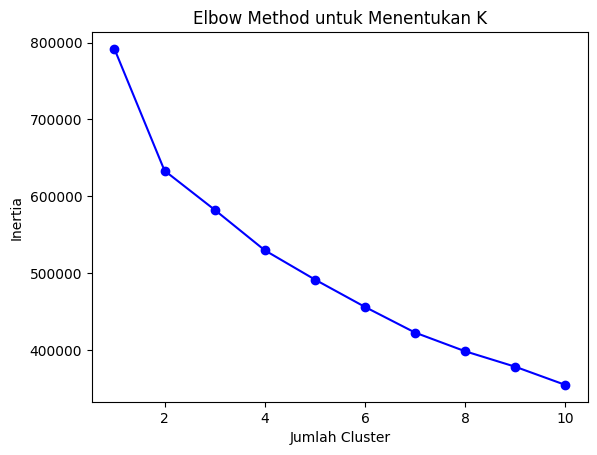

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)



In [ ]:
cluster_heart = df.groupby('cluster')['heart_attack'].value_counts(normalize=True).unstack()
print(cluster_heart)


heart_attack         0         1
cluster                         
0             0.549044  0.450956
1             0.600637  0.399363
2             0.646211  0.353789


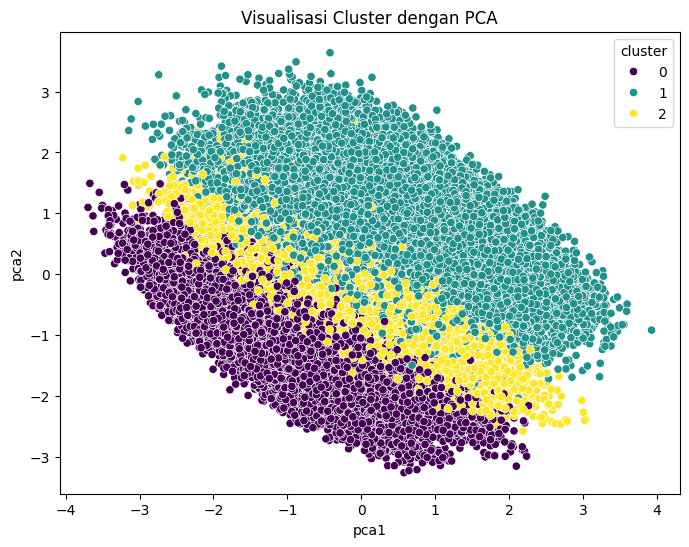

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis')
plt.title('Visualisasi Cluster dengan PCA')
plt.show()


Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ambil fitur dan target
X = df[['age', 'sleep_hours', 'gender', 'cholesterol_level', 'smoking_status']].copy()
y = df['heart_attack']

# Encode kolom kategorikal
le_gender = LabelEncoder()
le_smoke = LabelEncoder()

X['gender'] = le_gender.fit_transform(X['gender'])
X['smoking_status'] = le_smoke.fit_transform(X['smoking_status'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.6243566669824129
Confusion Matrix:
 [[16754  2217]
 [ 9680  3020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.88      0.74     18971
           1       0.58      0.24      0.34     12700

    accuracy                           0.62     31671
   macro avg       0.61      0.56      0.54     31671
weighted avg       0.61      0.62      0.58     31671



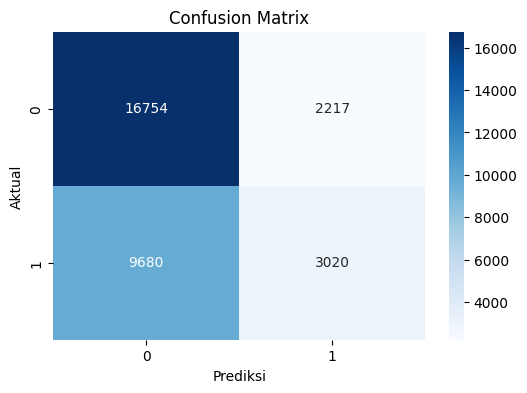

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

dashboard

In [ ]:
import joblib

# Setelah model dilatih
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_smoke, 'le_smoke.pkl')


['le_smoke.pkl']

In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load model dan preprocessing
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')
le_gender = joblib.load('le_gender.pkl')
le_smoke = joblib.load('le_smoke.pkl')

st.set_page_config(page_title="Prediksi Penyakit Jantung", layout="centered")

st.title("🔍 Prediksi Risiko Penyakit Jantung")
st.write("Masukkan informasi berikut untuk melihat prediksi:")

# Input user
age = st.number_input("Umur", 25, 90, 50)
sleep_hours = st.slider("Jam Tidur per Hari", 0.0, 12.0, 7.0)
gender = st.selectbox("Jenis Kelamin", le_gender.classes_)
cholesterol = st.number_input("Kadar Kolesterol", 100, 350, 200)
smoking_status = st.selectbox("Status Merokok", le_smoke.classes_)

# Prediksi
if st.button("Prediksi"):
    user_data = np.array([[age, sleep_hours, gender, cholesterol, smoking_status]])
    user_data[:, 2] = le_gender.transform(user_data[:, 2])
    user_data[:, 4] = le_smoke.transform(user_data[:, 4])
    user_data = scaler.transform(user_data.astype(float))
    
    prediction = model.predict(user_data)
    prob = model.predict_proba(user_data)[0][1]
    
    if prediction[0] == 1:
        st.error(f"⚠️ Risiko tinggi terkena penyakit jantung ({prob*100:.2f}%)")
    else:
        st.success(f"✅ Risiko rendah terkena penyakit jantung ({prob*100:.2f}%)")
